In [17]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# Read in data
demog_df = pd.read_csv(r'C:\Users\alrob\Documents\Grad School\BAN 5763\CLV Group Exercise\BAN_5763_MiniProj1\Original Files\demog_pmm_data.csv')
TP_churn_df = pd.read_csv(r'C:\Users\alrob\Documents\Grad School\BAN 5763\CLV Group Exercise\BAN_5763_MiniProj1\Original Files\TP_churn_data.csv')
TP_margin_df = pd.read_csv(r'C:\Users\alrob\Documents\Grad School\BAN 5763\CLV Group Exercise\BAN_5763_MiniProj1\Original Files\TP_margin_data.csv')


In [170]:
# Top 5 rows of demographic data
demog_df.head()

,demog_assets,demog_LOR,demog_ownrent,demog_age,demog_span,demog_inc_fine,demog_inc_crs,demog_generations,demog_homevalue,demog_adults,acct_ID
0,IPA <= 25000,4th Year,Definite Renter,35-44 years old,1,$ 20000 - $ 29999,$ 15000 - $ 29999,2,Less than $50000,2,I148760611
1,IPA <= 25000,13 - 18 Months,Definite Owner (any type dwelling unit),35-44 years old,0,$ 20000 - $ 29999,Less than $15000,1,$ 50000 - $ 99999,1,I151076142
2,IPA <= 25000,11th Year,Definite Owner (any type dwelling unit),55-64 years old,0,Less than $15000,Less than $15000,1,Less than $50000,1,I27001315
3,250000 < IPA <= 500000,3rd Year,Definite Owner (any type dwelling unit),55-64 years old,0,$ 50000 - $ 74999,$ 50000 - $ 74999,1,$150000 - $199999,1,I150064127
4,250000 < IPA <= 500000,9th Year,Definite Owner (any type dwelling unit),45-54 years old,0,$ 100000 - $124999,$ 100000 - $149999,2,$350000 - $399999,3,I152631565


In [171]:
# demographic data description
print(demog_df.describe(include='all').transpose())

                      count  unique                                      top  \
demog_assets         240368      10                             IPA <= 25000   
demog_LOR            240368      22                         20 or more Years   
demog_ownrent        240368       4  Definite Owner (any type dwelling unit)   
demog_age            240368       7                          55-64 years old   
demog_span         240368.0     NaN                                      NaN   
demog_inc_fine       240368      13                      $  50000 - $  74999   
demog_inc_crs        240368       9                      $  15000 - $  29999   
demog_generations  240368.0     NaN                                      NaN   
demog_homevalue      240368      17                         Less than $50000   
demog_adults       240368.0     NaN                                      NaN   
acct_ID              240368  239356                               I152065826   

                     freq      mean    

In [194]:
# Mapping categories to values
demog_assets_map = {'IPA <= 25000':1,'25000 < IPA <= 50000':2,'50000 < IPA <= 75000':3,'75000 < IPA <= 100000':4,
     '100000 < IPA <= 250000':5,'250000 < IPA <= 500000':6,'500000 < IPA <= 750000':7,
     '750000 < IPA <= 1000000':8, '1000000 < IPA <= 2000000':9, '2000000 < IPA':10}
demog_df['demog_assets'] = demog_df['demog_assets'].map(demog_assets_map)


demog_LOR_map = {'00 - 06 Months':1,'07 - 12 Months':2,'13 - 18 Months':3,'19 - 24 Months':4,
     '3rd Year':5,'4th Year':6,'5th Year':7, '6th Year':8, '7th Year':9, '8th Year':10, '9th Year':11,
     '10th Year':12, '11th Year':13, '12th Year':14, '13th Year':15, '14th Year':16, '15th Year':17,
     '16th Year':18, '17th Year':19, '18th Year':20, '19th Year':21, '20 or more Years':22}
demog_df['demog_LOR'] = demog_df['demog_LOR'].map(demog_LOR_map)

demog_age_map = {'18-24 years old':1,'25-34 years old':2,'35-44 years old':3,'45-54 years old':4,
     '55-64 years old':5,'65-74 years old':6,'75+ years old':7}
demog_df['demog_age'] = demog_df['demog_age'].map(demog_age_map)

demog_inc_fine_map = {'Less than $15000':1,'$  15000 - $  19999':2,'$  20000 - $  29999':3,'$  30000 - $  39999':4,
     '$  40000 - $  49999':5, '$  50000 - $  74999':6,'$  75000 - $  99999':7,'$ 100000 - $124999':8, 
     '$ 125000 - $149999':9, '$ 150000 - $174999':10, '$ 175000 - $199999':11, '$ 200000 - $249999':12, '$ 250000 or more':13}
demog_df['demog_inc_fine'] = demog_df['demog_inc_fine'].map(demog_inc_fine_map)


demog_inc_crs_map = {'Less than $15000':1,'$  15000 - $  29999':2,'$  30000 - $  39999':3,'$  40000 - $  49999':4,
     '$  50000 - $  74999':5,'$  75000 - $  99999':6,'$ 100000 - $149999':7, '$ 125000 - $149999':8, '$ 150000 - $199999':9,
     '$ 200000 or more':10}
demog_df['demog_inc_crs'] = demog_df['demog_inc_crs'].map(demog_inc_crs_map)

demog_homevalue_map = {'Less than $50000':1,'$ 50000 - $ 99999':2,'$100000 - $149999':3,'$150000 - $199999':4,
     '$200000 - $249999':5,'$250000 - $299999':6,'$300000 - $349999':7, '$350000 - $399999':8, 
     '$400000 - $449999':9, '$450000 - $499999':10, '$500000 - $599999':11, '$600000 - $699999':12,
     '$700000 - $799999':13, '$800000 - $999999':14, '$1000000 - $1499999':15, '$1500000 - $1999999':16,
     '$2000000 and over':17}
demog_df['demog_homevalue'] = demog_df['demog_homevalue'].map(demog_homevalue_map)

C:\Users\alrob\AppData\Local\Temp\ipykernel_26288\40506338.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


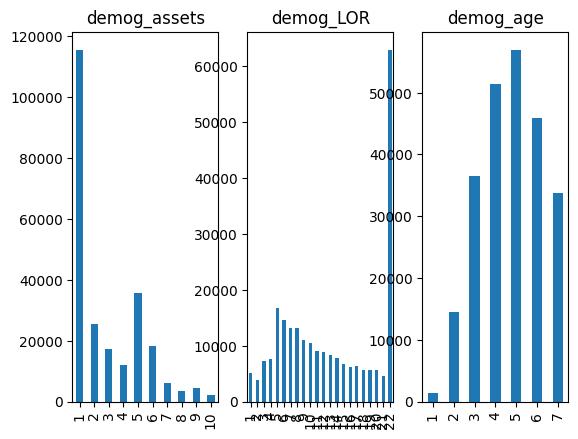

In [173]:
categorical_features = ["demog_assets", "demog_LOR", "demog_age"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(demog_df[categorical_features]):
    demog_df[categorical_feature].value_counts().sort_index().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

C:\Users\alrob\AppData\Local\Temp\ipykernel_26288\2682427995.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


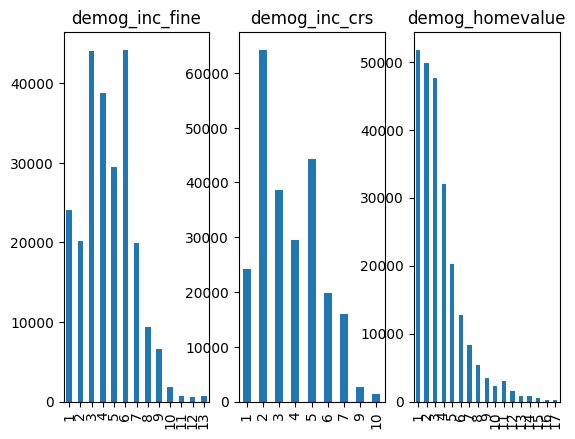

In [174]:
categorical_features = ["demog_inc_fine", "demog_inc_crs", "demog_homevalue"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(demog_df[categorical_features]):
    demog_df[categorical_feature].value_counts().sort_index().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

In [195]:
# creating yearly margin from revenue and cost columns
margin_df = TP_margin_df
margin_df['rev_Y_neg_1']=margin_df['trans_amt_t_minus_00']+margin_df['trans_amt_t_minus_01']+margin_df['trans_amt_t_minus_02']+margin_df['trans_amt_t_minus_03']+margin_df['trans_amt_t_minus_04']+margin_df['trans_amt_t_minus_05']+margin_df['trans_amt_t_minus_06']+margin_df['trans_amt_t_minus_07']+margin_df['trans_amt_t_minus_08']+margin_df['trans_amt_t_minus_09']+margin_df['trans_amt_t_minus_10']+margin_df['trans_amt_t_minus_11']
margin_df['cost_Y_neg_1']=margin_df['cost_amt_t_minus_00']+margin_df['cost_amt_t_minus_01']+margin_df['cost_amt_t_minus_02']+margin_df['cost_amt_t_minus_03']+margin_df['cost_amt_t_minus_04']+margin_df['cost_amt_t_minus_05']+margin_df['cost_amt_t_minus_06']+margin_df['cost_amt_t_minus_07']+margin_df['cost_amt_t_minus_08']+margin_df['cost_amt_t_minus_09']+margin_df['cost_amt_t_minus_10']+margin_df['cost_amt_t_minus_11']
margin_df['margin_Y_neg_1']=margin_df['rev_Y_neg_1']-margin_df['cost_Y_neg_1']

margin_df['rev_Y_neg_2']=margin_df['trans_amt_t_minus_12']+margin_df['trans_amt_t_minus_13']+margin_df['trans_amt_t_minus_14']+margin_df['trans_amt_t_minus_15']+margin_df['trans_amt_t_minus_16']+margin_df['trans_amt_t_minus_17']+margin_df['trans_amt_t_minus_18']+margin_df['trans_amt_t_minus_19']+margin_df['trans_amt_t_minus_20']+margin_df['trans_amt_t_minus_21']+margin_df['trans_amt_t_minus_22']+margin_df['trans_amt_t_minus_23']
margin_df['cost_Y_neg_2']=margin_df['cost_amt_t_minus_12']+margin_df['cost_amt_t_minus_13']+margin_df['cost_amt_t_minus_14']+margin_df['cost_amt_t_minus_15']+margin_df['cost_amt_t_minus_16']+margin_df['cost_amt_t_minus_17']+margin_df['cost_amt_t_minus_18']+margin_df['cost_amt_t_minus_19']+margin_df['cost_amt_t_minus_20']+margin_df['cost_amt_t_minus_21']+margin_df['cost_amt_t_minus_22']+margin_df['cost_amt_t_minus_23']
margin_df['margin_Y_neg_2']=margin_df['rev_Y_neg_2']-margin_df['cost_Y_neg_2']

margin_df['rev_Y_neg_3']=margin_df['trans_amt_t_minus_24']+margin_df['trans_amt_t_minus_25']+margin_df['trans_amt_t_minus_26']+margin_df['trans_amt_t_minus_27']+margin_df['trans_amt_t_minus_28']+margin_df['trans_amt_t_minus_29']+margin_df['trans_amt_t_minus_30']+margin_df['trans_amt_t_minus_31']+margin_df['trans_amt_t_minus_32']+margin_df['trans_amt_t_minus_33']+margin_df['trans_amt_t_minus_34']+margin_df['trans_amt_t_minus_35']
margin_df['cost_Y_neg_3']=margin_df['cost_amt_t_minus_24']+margin_df['cost_amt_t_minus_25']+margin_df['cost_amt_t_minus_26']+margin_df['cost_amt_t_minus_27']+margin_df['cost_amt_t_minus_28']+margin_df['cost_amt_t_minus_29']+margin_df['cost_amt_t_minus_30']+margin_df['cost_amt_t_minus_31']+margin_df['cost_amt_t_minus_32']+margin_df['cost_amt_t_minus_33']+margin_df['cost_amt_t_minus_34']+margin_df['cost_amt_t_minus_35']
margin_df['margin_Y_neg_3']=margin_df['rev_Y_neg_3']-margin_df['cost_Y_neg_3']

margin_df['rev_Y_pos_1']=margin_df['trans_amt_t_plus_01']+margin_df['trans_amt_t_plus_02']+margin_df['trans_amt_t_plus_03']+margin_df['trans_amt_t_plus_04']+margin_df['trans_amt_t_plus_05']+margin_df['trans_amt_t_plus_06']+margin_df['trans_amt_t_plus_07']+margin_df['trans_amt_t_plus_08']+margin_df['trans_amt_t_plus_09']+margin_df['trans_amt_t_plus_10']+margin_df['trans_amt_t_plus_11']+margin_df['trans_amt_t_plus_12']
margin_df['cost_Y_pos_1']=margin_df['cost_amt_t_plus_01']+margin_df['cost_amt_t_plus_02']+margin_df['cost_amt_t_plus_03']+margin_df['cost_amt_t_plus_04']+margin_df['cost_amt_t_plus_05']+margin_df['cost_amt_t_plus_06']+margin_df['cost_amt_t_plus_07']+margin_df['cost_amt_t_plus_08']+margin_df['cost_amt_t_plus_09']+margin_df['cost_amt_t_plus_10']+margin_df['cost_amt_t_plus_11']+margin_df['cost_amt_t_plus_12']
margin_df['margin_Y_pos_1']=margin_df['rev_Y_pos_1']-margin_df['cost_Y_pos_1']

margin_df = margin_df[['acct_ID','margin_Y_neg_1','margin_Y_neg_2','margin_Y_neg_3','margin_Y_pos_1']]

array([[<AxesSubplot:title={'center':'margin_Y_neg_1'}>,
        <AxesSubplot:title={'center':'margin_Y_neg_2'}>],
       [<AxesSubplot:title={'center':'margin_Y_neg_3'}>,
        <AxesSubplot:title={'center':'margin_Y_pos_1'}>]], dtype=object)

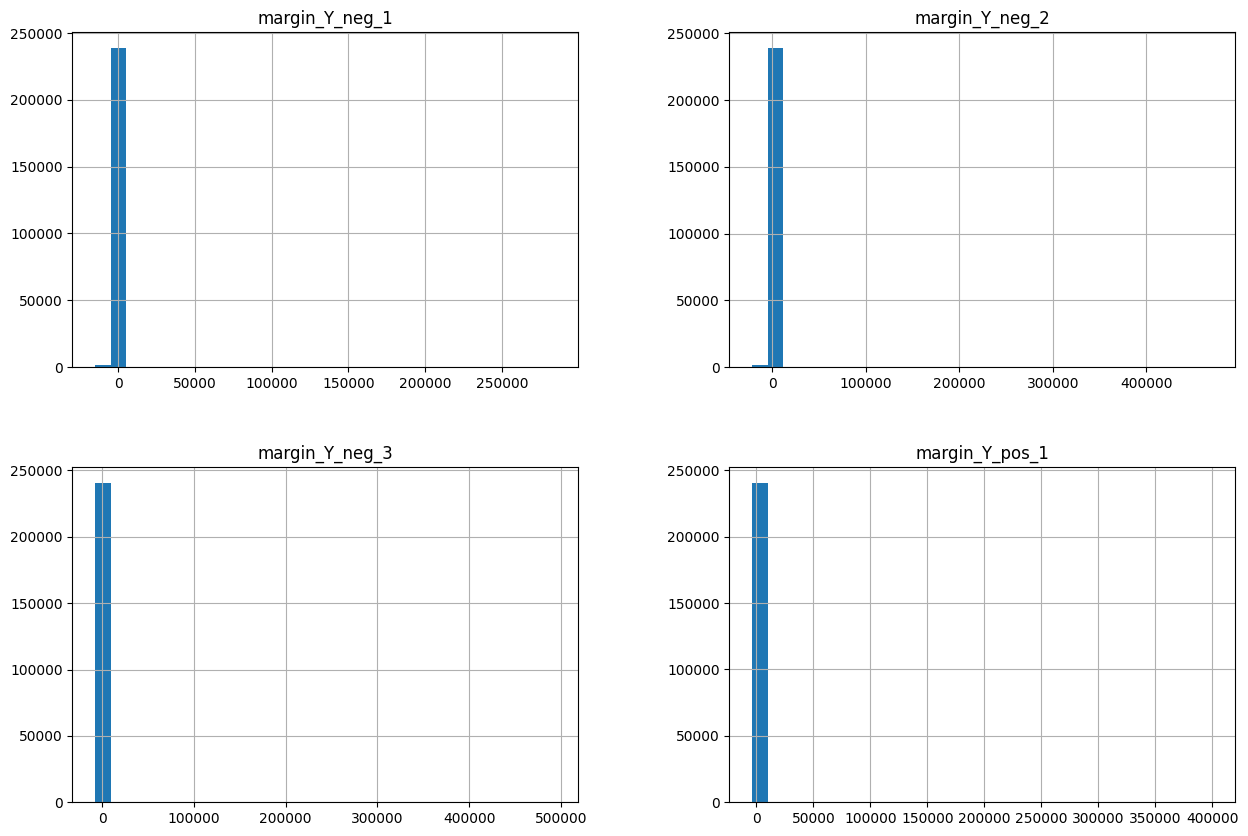

In [176]:
# Distribution of margin columns
margin_cont=margin_df[['margin_Y_neg_1','margin_Y_neg_2','margin_Y_neg_3','margin_Y_pos_1']]
margin_cont.hist(bins=30, figsize=(15, 10))

In [196]:
# creating 3 year average and log of margins
margin_df['margin_3yr_avg']=(margin_df['margin_Y_neg_1']+margin_df['margin_Y_neg_2']+margin_df['margin_Y_neg_3'])/3
margin_df['log_margin_Y_neg_1']=np.log10(margin_df['margin_Y_neg_1']+50000)
margin_df['log_margin_Y_neg_2']=np.log10(margin_df['margin_Y_neg_2']+50000)
margin_df['log_margin_Y_neg_3']=np.log10(margin_df['margin_Y_neg_3']+50000)
margin_df['log_margin_3yr_avg']=np.log10(margin_df['margin_3yr_avg']+50000)
margin_df['log_margin_Y_pos_1']=np.log10(margin_df['margin_Y_pos_1']+50000)

C:\Users\alrob\AppData\Local\Temp\ipykernel_26288\472154758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  margin_df['margin_3yr_avg']=(margin_df['margin_Y_neg_1']+margin_df['margin_Y_neg_2']+margin_df['margin_Y_neg_3'])/3


array([[<AxesSubplot:title={'center':'log_margin_Y_neg_1'}>,
        <AxesSubplot:title={'center':'log_margin_Y_neg_2'}>],
       [<AxesSubplot:title={'center':'log_margin_Y_neg_3'}>,
        <AxesSubplot:title={'center':'log_margin_Y_pos_1'}>]],
      dtype=object)

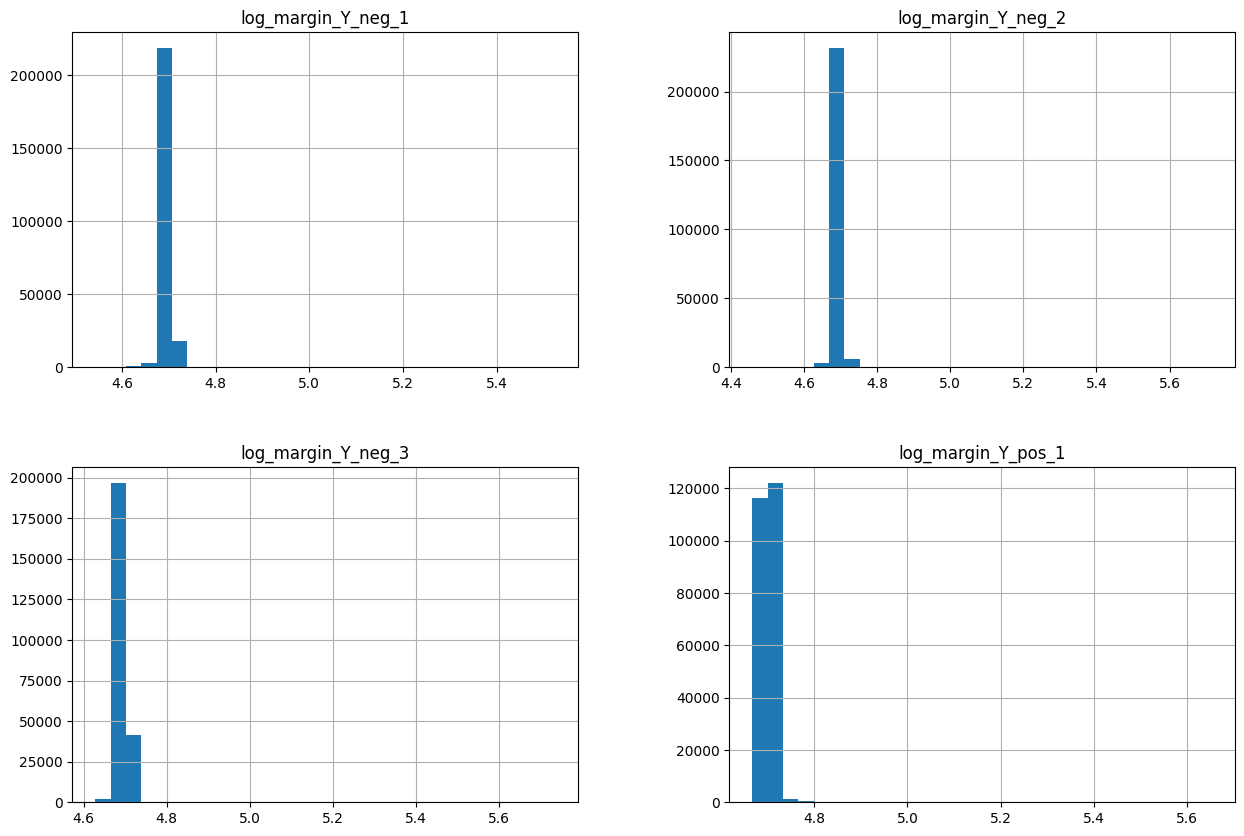

In [178]:
# Improved distribution of log margin columns
margin_cont=margin_df[['log_margin_Y_neg_1','log_margin_Y_neg_2','log_margin_Y_neg_3','log_margin_Y_pos_1']]
margin_cont.hist(bins=30, figsize=(15, 10))

In [197]:
# First 5 rows of churn data
churn_df=TP_churn_df
churn_df.head()

,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,...,resp_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,order_cnt_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind
0,SC,29607,567,864,1,1,1,0,0,3,...,0,0,1,1,1-Bronze,xxx,I148760611,30NOV12,31MAY15,1
1,MO,63901,632,573,1,1,1,0,0,9,...,0,1,0,1,1-Bronze,xxx,I151076142,29NOV13,29NOV14,1
2,IL,60456,602,missing,0,1,1,0,0,1,...,2,0,0,4,1-Bronze,xxx,I27001315,05OCT00,NaN,0
3,FL,34698,539,727,1,1,1,0,0,9,...,0,1,1,3,3-Gold,xxx,I150064127,31JUL13,29NOV14,1
4,CA,92084,825,760,0,1,1,0,0,1,...,0,0,0,2,1-Bronze,xxx,I152631565,30JUN14,NaN,0


array([[<AxesSubplot:title={'center':'call_in_mo_36mo'}>,
        <AxesSubplot:title={'center':'call_out_mo_36mo'}>,
        <AxesSubplot:title={'center':'mail_cnt_36mo'}>],
       [<AxesSubplot:title={'center':'order_cnt_36mo'}>,
        <AxesSubplot:title={'center':'purch_amt_36mo'}>,
        <AxesSubplot:title={'center':'purch_amt_life'}>],
       [<AxesSubplot:title={'center':'purch_avg_36mo'}>,
        <AxesSubplot:title={'center':'purch_avg_interval'}>,
        <AxesSubplot:title={'center':'purch_cnt_life'}>],
       [<AxesSubplot:title={'center':'purch_cnt_tt_36mo'}>,
        <AxesSubplot:title={'center':'resp_cnt_36mo'}>, <AxesSubplot:>]],
      dtype=object)

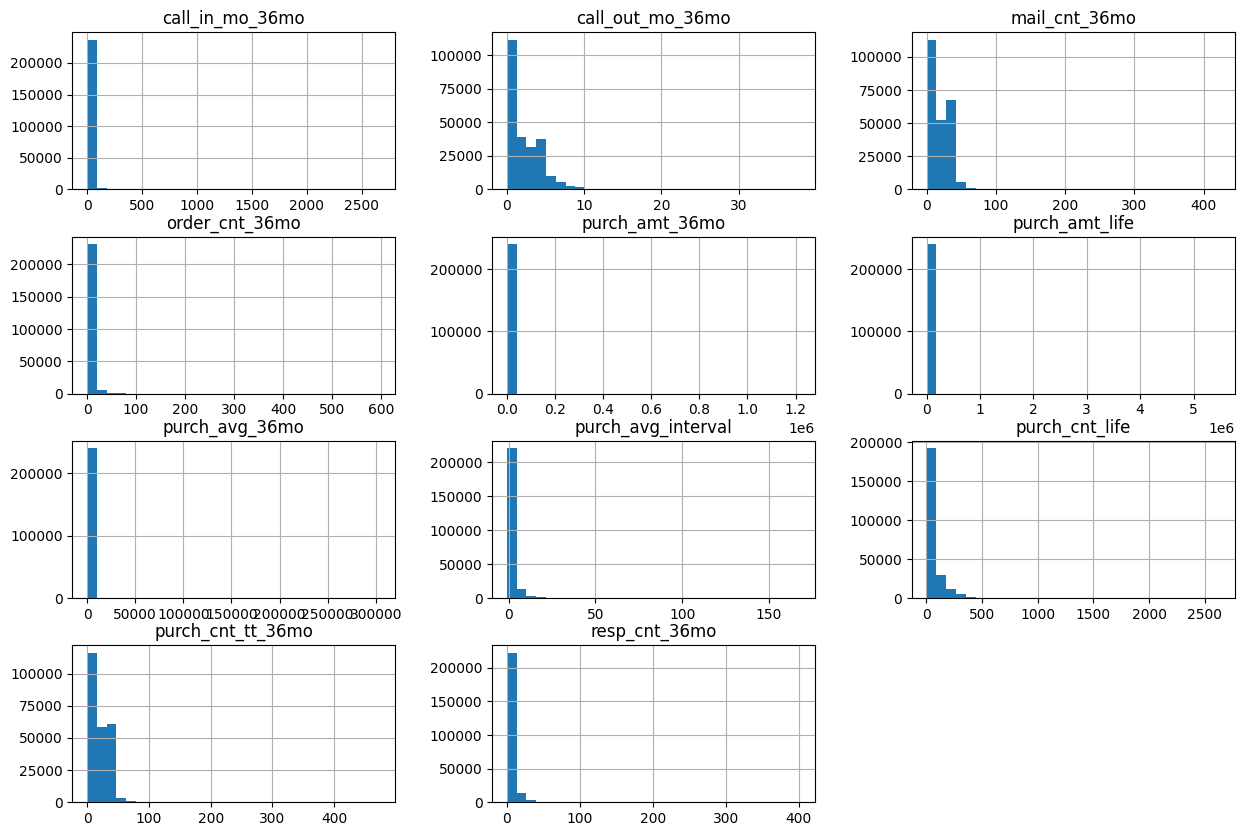

In [180]:
# Distribution of right skewed continuous variables
churn_cont=churn_df[['call_in_mo_36mo', 'call_out_mo_36mo', 'mail_cnt_36mo', 'order_cnt_36mo', 'purch_amt_36mo',
                     'purch_amt_life', 'purch_avg_36mo', 'purch_avg_interval',
                     'purch_cnt_life', 'purch_cnt_tt_36mo','resp_cnt_36mo']]
churn_cont.hist(bins=30, figsize=(15, 10))

In [200]:
# cleaning up negative values
""" when avg interval = -1 replace with 36 months """
churn_df['purch_avg_interval'].replace([-1], 36, inplace=True)

""" when avg purchase = -1 replace with 0 """
churn_df['purch_avg_36mo'].replace([-1], 0, inplace=True)


# log transformation of right skewed variables
churn_df['log_call_in_mo_36mo']=np.log10(churn_df['call_in_mo_36mo']+1)
churn_df['log_call_out_mo_36mo']=np.log10(churn_df['call_out_mo_36mo']+1)
churn_df['log_mail_cnt_36mo']=np.log10(churn_df['mail_cnt_36mo']+1)
churn_df['log_order_cnt_36mo']=np.log10(churn_df['order_cnt_36mo']+1)
churn_df['log_purch_amt_36mo']=np.log10(churn_df['purch_amt_36mo']+1)
churn_df['log_purch_amt_life']=np.log10(churn_df['purch_amt_life']+1)
churn_df['log_purch_avg_36mo']=np.log10(churn_df['purch_avg_36mo']+1)
churn_df['log_purch_avg_interval']=np.log10(churn_df['purch_avg_interval']+1)
churn_df['log_purch_cnt_life']=np.log10(churn_df['purch_cnt_life']+1)
churn_df['log_purch_cnt_tt_36mo']=np.log10(churn_df['purch_cnt_tt_36mo']+1)
churn_df['log_resp_cnt_36mo']=np.log10(churn_df['resp_cnt_36mo']+1)

# calculating percents of purchase type counts
churn_df['perc_purch_cc_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_cc_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_ck_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_ck_36mo']/churn_df['purch_cnt_tt_36mo'])
churn_df['perc_purch_et_36mo']=np.where(churn_df['purch_cnt_tt_36mo']==0,0,churn_df['purch_cnt_et_36mo']/churn_df['purch_cnt_tt_36mo'])

# dropping unused columns
churn_df = churn_df.drop(['call_in_mo_36mo', 'call_out_mo_36mo', 'mail_cnt_36mo',
                          'order_cnt_36mo','purch_amt_36mo','purch_amt_life','purch_avg_36mo','purch_cnt_life',
                          'resp_cnt_36mo', 'purch_cnt_cc_36mo','purch_cnt_ck_36mo','purch_cnt_et_36mo'],axis=1)

#churn_df = churn_df.drop(['purch_cnt_cc_36mo','purch_cnt_ck_36mo','purch_cnt_et_36mo'],axis=1)


array([[<AxesSubplot:title={'center':'log_call_in_mo_36mo'}>,
        <AxesSubplot:title={'center':'log_call_out_mo_36mo'}>,
        <AxesSubplot:title={'center':'log_mail_cnt_36mo'}>],
       [<AxesSubplot:title={'center':'log_order_cnt_36mo'}>,
        <AxesSubplot:title={'center':'log_purch_amt_36mo'}>,
        <AxesSubplot:title={'center':'log_purch_amt_life'}>],
       [<AxesSubplot:title={'center':'log_purch_avg_36mo'}>,
        <AxesSubplot:title={'center':'log_purch_avg_interval'}>,
        <AxesSubplot:title={'center':'log_purch_cnt_life'}>],
       [<AxesSubplot:title={'center':'log_purch_cnt_tt_36mo'}>,
        <AxesSubplot:title={'center':'log_resp_cnt_36mo'}>,
        <AxesSubplot:>]], dtype=object)

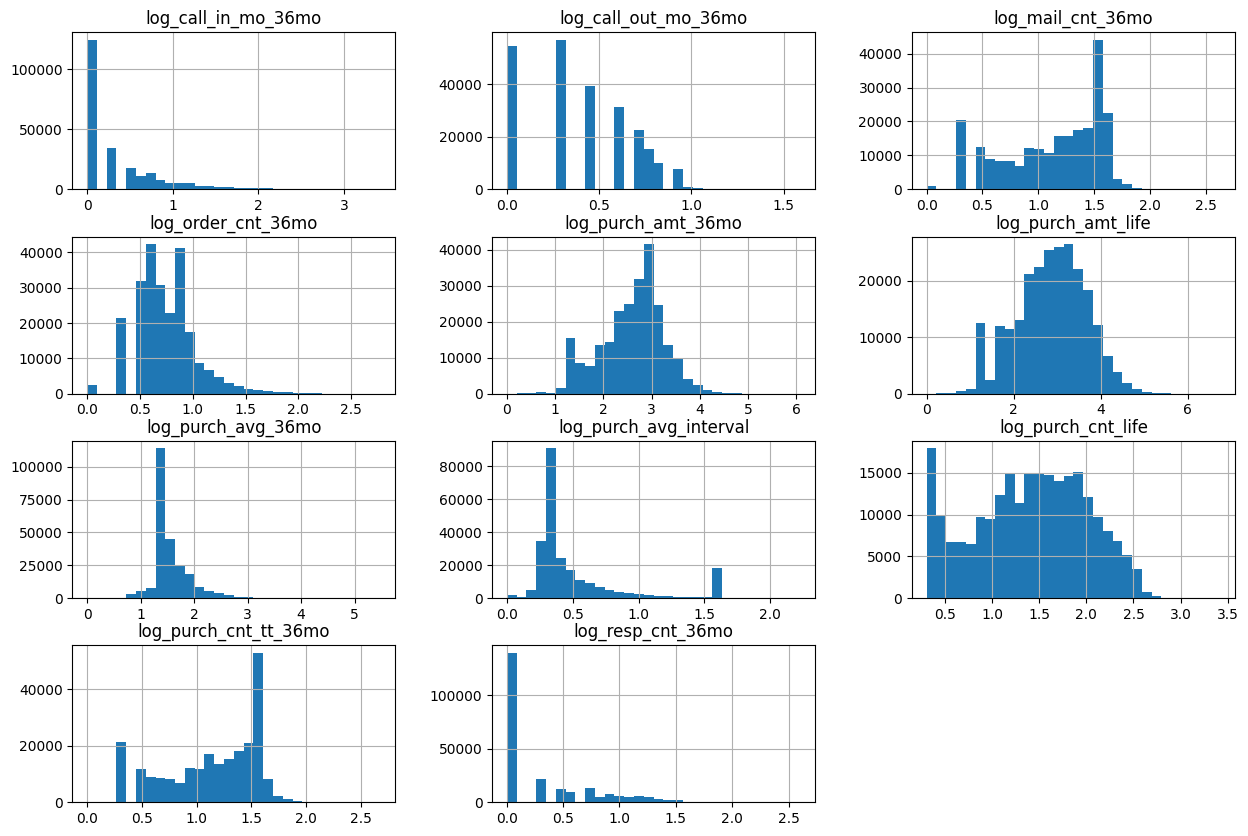

In [182]:
# Distribution of log trasnformed variables
churn_cont=churn_df[['log_call_in_mo_36mo', 'log_call_out_mo_36mo', 'log_mail_cnt_36mo', 
                     'log_order_cnt_36mo', 'log_purch_amt_36mo', 'log_purch_amt_life', 
                     'log_purch_avg_36mo', 'log_purch_avg_interval', 'log_purch_cnt_life', 'log_purch_cnt_tt_36mo',
                     'log_resp_cnt_36mo']]
churn_cont.hist(bins=30, figsize=(15, 10))

In [201]:
# map churn tier columns
churn_tier_map = {'1-Bronze':1,'2-Silver':2,'3-Gold':3,'4-Platinum':4,'5-Diamond':5}
churn_df['tier'] = churn_df['tier'].map(churn_tier_map)

churn_tier_pv_map = {'xxx':0,'1-Bronze':1,'2-Silver':2,'3-Gold':3,'4-Platinum':4,'5-Diamond':5}
churn_df['tier_prev'] = churn_df['tier_prev'].map(churn_tier_pv_map)

In [184]:

churn_df.shape


(240368, 32)

In [202]:
# drop duplicate rows in churn dataframe
churn_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
churn_df.shape

(239356, 31)

In [203]:
# drop duplicate rows in margin dataframe
margin_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
margin_df.shape

C:\Users\alrob\AppData\Local\Temp\ipykernel_26288\790034314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  margin_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)


(239356, 6)

In [204]:
# drop duplicate rows in demographic dataframe
demog_df.drop_duplicates(subset=['acct_ID'], keep='first', inplace=True)
demog_df.shape

(239356, 11)

In [205]:
# combine churn and margin
combined_df = pd.merge(churn_df, margin_df, on='acct_ID', how='inner')
combined_df.shape

(239356, 36)

In [206]:
# add in demographic
combined_df = pd.merge(combined_df, demog_df, on='acct_ID', how='inner')
combined_df.shape

(239356, 46)

In [207]:
#create dummy variables for remaining categorical data
combined_df = pd.get_dummies(combined_df, columns=['demog_ownrent', 'ST'])


In [208]:
# export combined data
combined_df.to_csv(r'C:\Users\alrob\Documents\Grad School\BAN 5763\CLV Group Exercise\BAN_5763_MiniProj1\Output Files\combined_data2.csv',index=False)